In [1]:
#get the data from
!wget 'https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0'
!unzip 'train.zip?dl=0'

--2024-03-18 11:38:23--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2024-03-18 11:38:23--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd1a307d0c4969d041fee4ee7f1.dl.dropboxusercontent.com/cd/0/inline/CPWMrz87UR3KKGh8uVa_L9yMOGc5bNG-eri7UMNMQOwzp-GYI_nubsGrZ58rNREZVg3pcLXbCv_A7cY70ZFiBS0M9VoPndgXWzdqHv_X-9RUXpEwaTFHz0yMI2Rpvq-7surLL4Qu-JyuuZg8NBWSAdpc/file# [following]
--2024-03-18 11:38:23--  https://ucd1a307d0c4969d041fee4ee7f1.dl.dropboxusercontent.com/cd/0/inline/CPWMrz87UR3KKGh8uVa_L9yMOGc5bNG-eri7UMNMQOwzp-GYI_nubsGrZ58rNREZVg3pcLXbCv_A7cY70ZFiBS0M9VoPndgXWzdqHv_X-9RUXpEwaTFHz0yMI2Rpvq-7surLL4

In [2]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install keras
!pip3 install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model 
from keras.layers import Flatten, Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

2024-03-18 11:39:18.820901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
!wget 'https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5'

--2024-03-18 11:55:05--  https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.114.207, 142.250.115.207, 142.251.116.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.114.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17225924 (16M) [application/x-hdf]
Saving to: ‘mobilenet_1_0_224_tf_no_top.h5.1’

mobilenet_1_0_224_t 100%[===================>]  16.43M  47.9MB/s    in 0.3s    

2024-03-18 11:55:06 (47.9 MB/s) - ‘mobilenet_1_0_224_tf_no_top.h5.1’ saved [17225924/17225924]



In [13]:
# Initialize the base model with the specified parameters but without loading the default weights
base_model = MobileNet(input_shape=(224,224,3), include_top=False, weights=None)

# Load the weights from the file you downloaded
weights_path = '/Users/mac/Documents/GitHub/emotion-detection/mobilenet_1_0_224_tf_no_top.h5'  # Update this to the correct path
base_model.load_weights(weights_path)

# Mark the layers of the base model as not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(units=7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

In [25]:
# Initialize the ImageDataGenerator with your specified augmentations
train_datagen = ImageDataGenerator(
    zoom_range=0.2, 
    shear_range=0.2, 
    horizontal_flip=True, 
    rescale=1./255
)

# Load images from the specified directory
train_data = train_datagen.flow_from_directory(
    directory="/Users/mac/Documents/GitHub/emotion-detection/train", 
    target_size=(224,224), 
    batch_size=32
)  # Removed the extra parenthesis here


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [29]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/Users/mac/Documents/GitHub/emotion-detection/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


In [35]:
!pip3 install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 590.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 35.0 MB/s eta 0:00:0000:0100:01


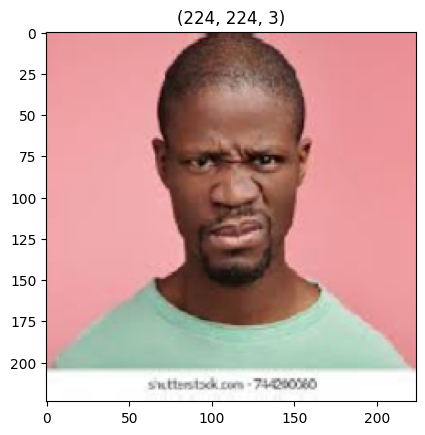

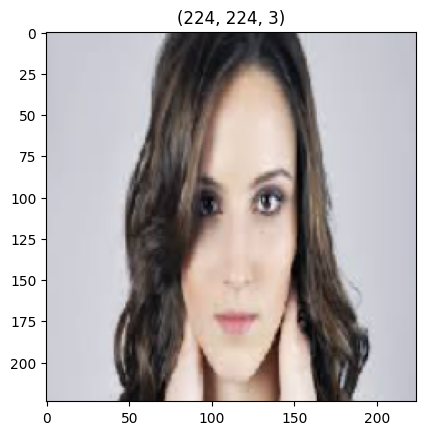

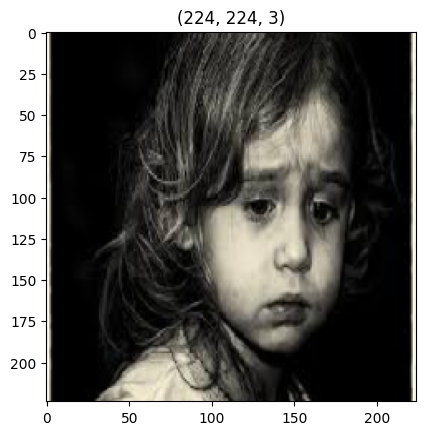

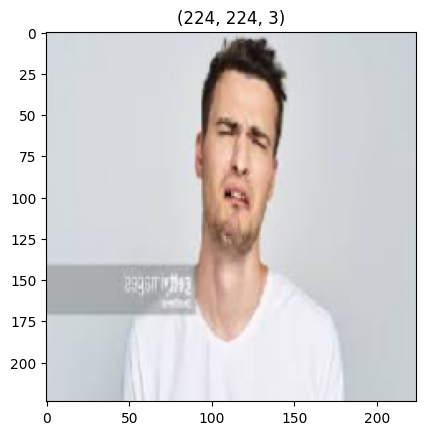

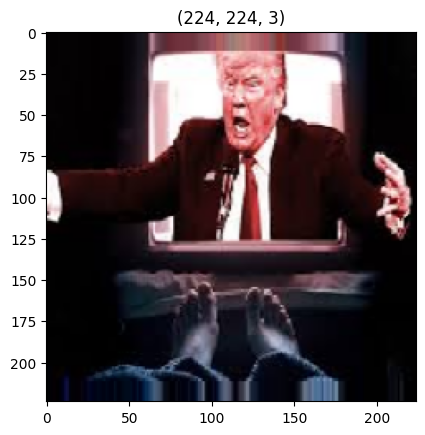

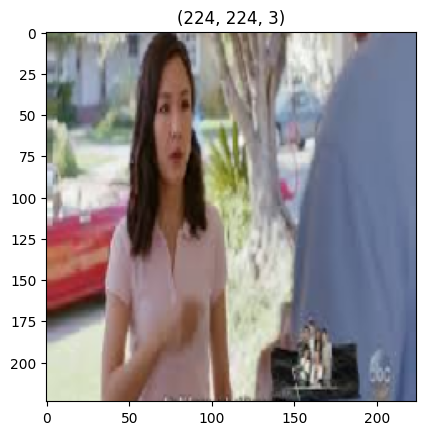

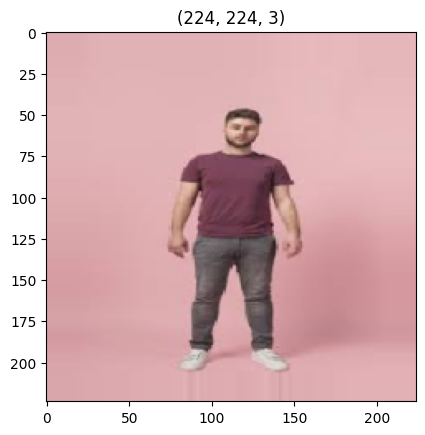

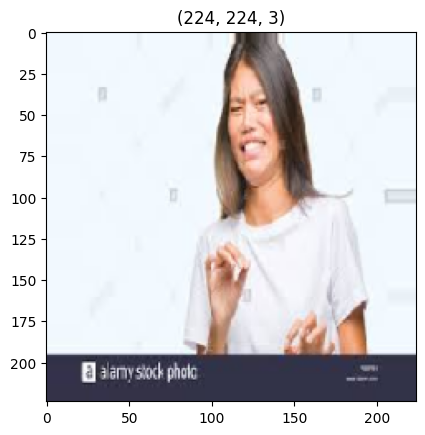

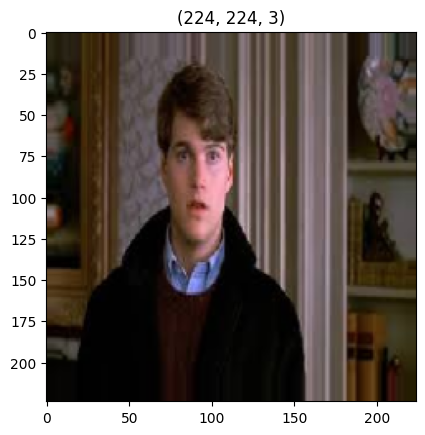

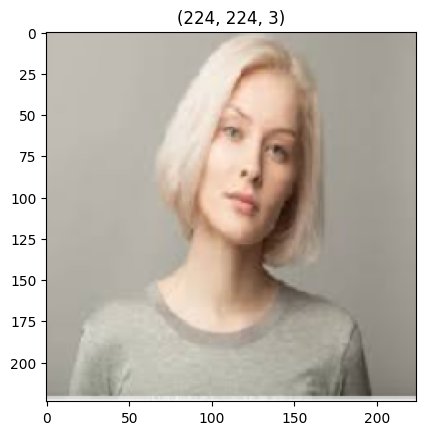

In [37]:
# to visualize the images in the traing data denerator 
import matplotlib.pyplot as plt
t_img, label = next(train_data)

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [39]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# puting call back in a list 
call_back = [es, mc]

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(
    train_data, 
    steps_per_epoch=10, 
    epochs=30, 
    validation_data=val_data, 
    validation_steps=8, 
    callbacks=[es, mc]
)

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.1702 - loss: 9.0600
Epoch 1: val_accuracy improved from -inf to 0.45703, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1739 - loss: 9.2406 - val_accuracy: 0.4570 - val_loss: 6.4625
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 6s 740ms/step - accuracy: 0.3125 - loss: 7.6702

2024-03-18 12:31:53.099258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy improved from 0.45703 to 0.53191, saving model to best_model.keras


2024-03-18 12:31:55.379389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.3125 - loss: 4.2186 - val_accuracy: 0.5319 - val_loss: 2.8791
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.5265 - loss: 5.0314
Epoch 3: val_accuracy improved from 0.53191 to 0.68359, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5278 - loss: 4.9939 - val_accuracy: 0.6836 - val_loss: 2.4074
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 5s 647ms/step - accuracy: 0.7188 - loss: 2.5185

2024-03-18 12:32:13.206951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_accuracy improved from 0.68359 to 0.73404, saving model to best_model.keras


2024-03-18 12:32:15.165564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 0.7188 - loss: 1.3852 - val_accuracy: 0.7340 - val_loss: 1.1434
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.7416 - loss: 1.7106
Epoch 5: val_accuracy improved from 0.73404 to 0.80859, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7425 - loss: 1.7041 - val_accuracy: 0.8086 - val_loss: 0.9385
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 6s 756ms/step - accuracy: 0.7812 - loss: 2.2747

2024-03-18 12:32:32.013762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_accuracy improved from 0.80859 to 0.82979, saving model to best_model.keras


2024-03-18 12:32:34.200668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.7812 - loss: 1.2511 - val_accuracy: 0.8298 - val_loss: 0.6448
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.8543 - loss: 0.5590
Epoch 7: val_accuracy improved from 0.82979 to 0.91016, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8547 - loss: 0.5682 - val_accuracy: 0.9102 - val_loss: 0.3701
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 5s 665ms/step - accuracy: 0.7812 - loss: 0.6781

2024-03-18 12:32:51.722198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_accuracy improved from 0.91016 to 0.97872, saving model to best_model.keras


2024-03-18 12:32:53.773992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.7812 - loss: 0.3729 - val_accuracy: 0.9787 - val_loss: 0.0779
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - accuracy: 0.9307 - loss: 0.3061
Epoch 9: val_accuracy did not improve from 0.97872
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9293 - loss: 0.3134 - val_accuracy: 0.9688 - val_loss: 0.1245
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 5s 655ms/step - accuracy: 0.9333 - loss: 0.8684

2024-03-18 12:33:10.646483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_accuracy did not improve from 0.97872
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.9333 - loss: 0.4776 - val_accuracy: 0.9574 - val_loss: 0.1762
Epoch 11/30


2024-03-18 12:33:12.772057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.8905 - loss: 0.4059
Epoch 11: val_accuracy did not improve from 0.97872
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8913 - loss: 0.4005 - val_accuracy: 0.9375 - val_loss: 0.2171
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 7s 857ms/step - accuracy: 0.8438 - loss: 0.4887

2024-03-18 12:33:30.138140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_accuracy did not improve from 0.97872
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.8438 - loss: 0.2688 - val_accuracy: 0.9468 - val_loss: 0.1174
Epoch 13/30


2024-03-18 12:33:32.124812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.9331 - loss: 0.2906
Epoch 13: val_accuracy did not improve from 0.97872
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9338 - loss: 0.2829 - val_accuracy: 0.9297 - val_loss: 0.2706
Epoch 13: early stopping


In [47]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/Users/mac/Documents/GitHub/emotion-detection/best_model.keras")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 168 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [48]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

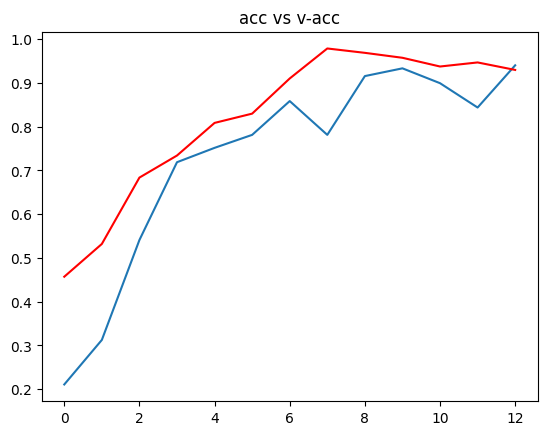

In [49]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

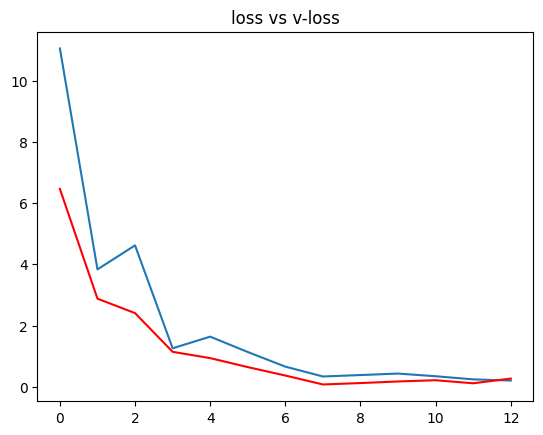

In [50]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [51]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
 the image is of Angry


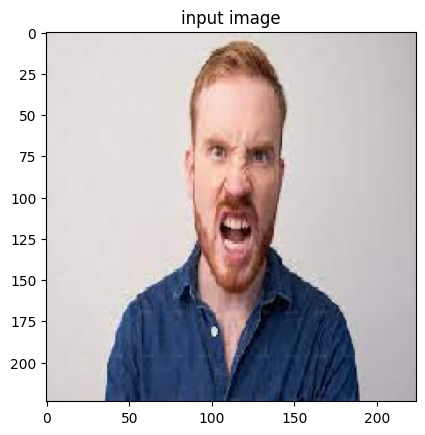

In [52]:
# path for the image to see if it predics correct class

path = "/Users/mac/Documents/GitHub/emotion-detection/train/Angry/download (3).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()